In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Required Imports

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploratory Data Analysis


In [3]:
#data loading
train=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [4]:
train.head(5)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [6]:
train.nunique()

MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   6
IsPassiveModeEnabled                      2
AntivirusConfigID                      1976
NumAntivirusProductsInstalled             5
NumAntivirusProductsEnabled               5
HasTpm                                    2
CountryID                               220
CityID                                16047
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease                      9
OSBuildLab                      

In [7]:
#Finding binary and single value columns 
print(train.nunique()[train.nunique() <= 2])

ProductName                         2
IsBetaUser                          1
IsPassiveModeEnabled                2
HasTpm                              2
IsSystemProtected                   2
AutoSampleSubmissionEnabled         1
SMode                               2
FirewallEnabled                     2
DeviceFamily                        2
HasOpticalDiskDrive                 2
IsPortableOS                        2
IsFlightsDisabled                   1
IsSecureBootEnabled                 2
IsVirtualDevice                     2
IsTouchEnabled                      2
IsPenCapable                        2
IsAlwaysOnAlwaysConnectedCapable    2
IsGamer                             2
target                              2
dtype: int64


**Observations**

Columns with singular values i.e **[IsFlightsDisabled,AutoSampleSubmissionEnabled,IsBetaUser]** & **[MachineID]** which has no categorical use can be dropped during preprocessing to reduce number of columns

In [8]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

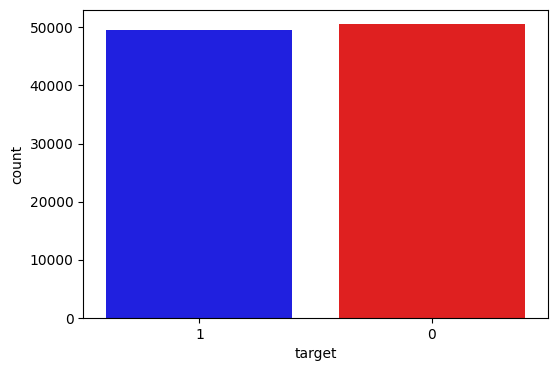

In [9]:
#finding target distribution
plt.figure(figsize=(6, 4))
dist = train['target'].value_counts()
sns.countplot(x='target', data=train, palette=['blue', 'red'])
plt.xticks(ticks=range(len(dist)), labels=dist.index)
plt.show()

In [10]:
train['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

**Observations** 

The distribution of the target variable is more or less **balanced** therefore bias correction will not be required

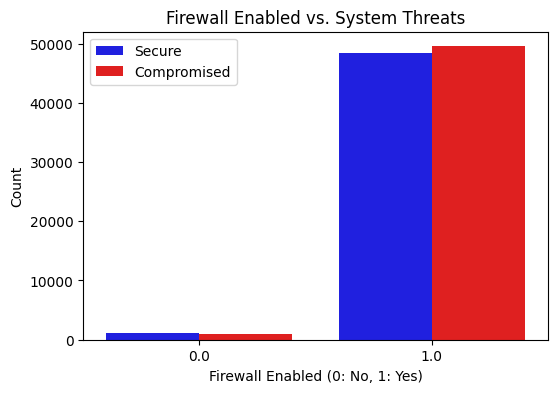

In [11]:
#If Firewall Enabled has any effect on the target
plt.figure(figsize=(6,4))
sns.countplot(x=train['FirewallEnabled'], hue=train['target'], palette=['blue', 'red'])
plt.title("Firewall Enabled vs. System Threats")
plt.xlabel("Firewall Enabled (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

In [12]:
train.groupby('FirewallEnabled')['target'].value_counts().unstack(fill_value=0)

target,0,1
FirewallEnabled,,
0.0,1056,934
1.0,48328,49516


**Observation** 

There is not much difference in the distribution of the target variable with respect to FirewallEnabled,  

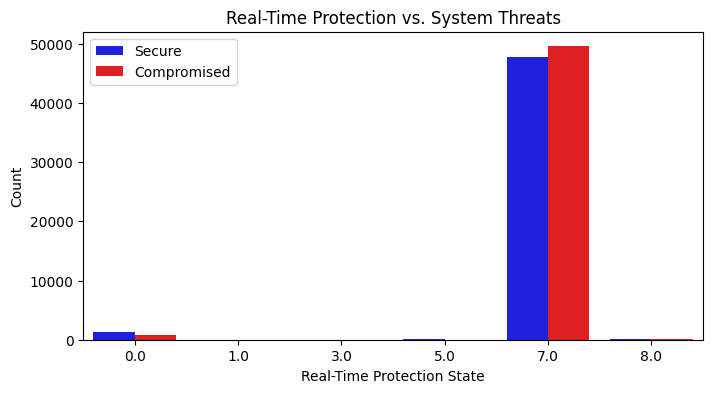

In [13]:
#If RealTimeProtectionState has any effect on the target
plt.figure(figsize=(8,4))
sns.countplot(x=train['RealTimeProtectionState'], hue=train['target'], palette=['blue', 'red'])
plt.title("Real-Time Protection vs. System Threats")
plt.xlabel("Real-Time Protection State")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observation** 
* Real-Time Protection State 0 has been able to provide more security than state 7 in terms of percentage, however, more machines have protection state 7 where occurence of system compromises is relatively more.
* There are very less machines using state 1.0, 3.0, 5.0 and 8.0

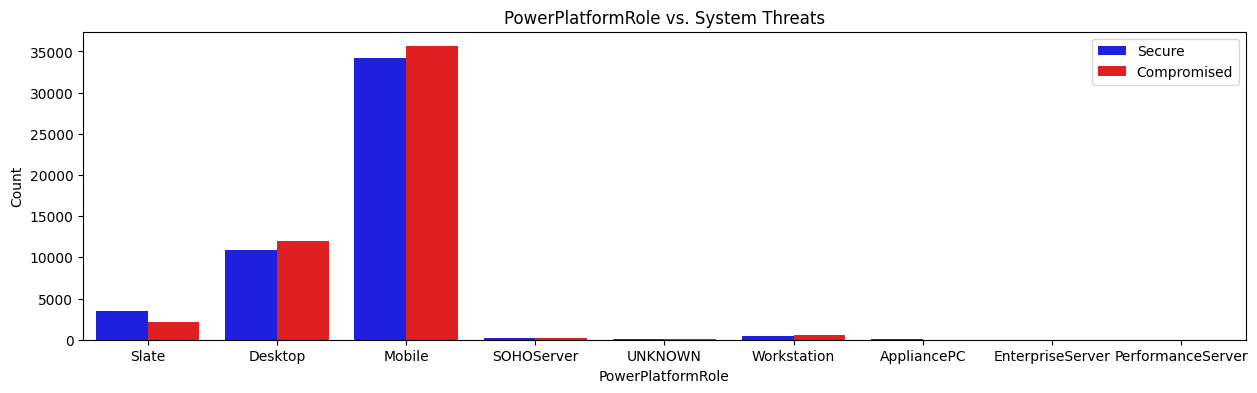

In [14]:
#PowerPlatformRole's effect on target distribution
plt.figure(figsize=(15,4))
sns.countplot(x=train['PowerPlatformRole'], hue=train['target'], palette=['blue', 'red'])
plt.title("PowerPlatformRole vs. System Threats")
plt.xlabel("PowerPlatformRole")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observations**

* Mobile devices have the highest counts, both in secure and compromised categories, with compromised devices slightly outnumbering secure ones. This suggests mobile platforms are more vulnerable to threats.
* Desktop systems show a relatively less occurence but lean towards compromised.
* Slate shows skewness towards Secure systems
* Categories such as UNKNOWN, AppliancePC, and EnterpriseServer etc have negligible data points, which might not contribute significantly to model training.

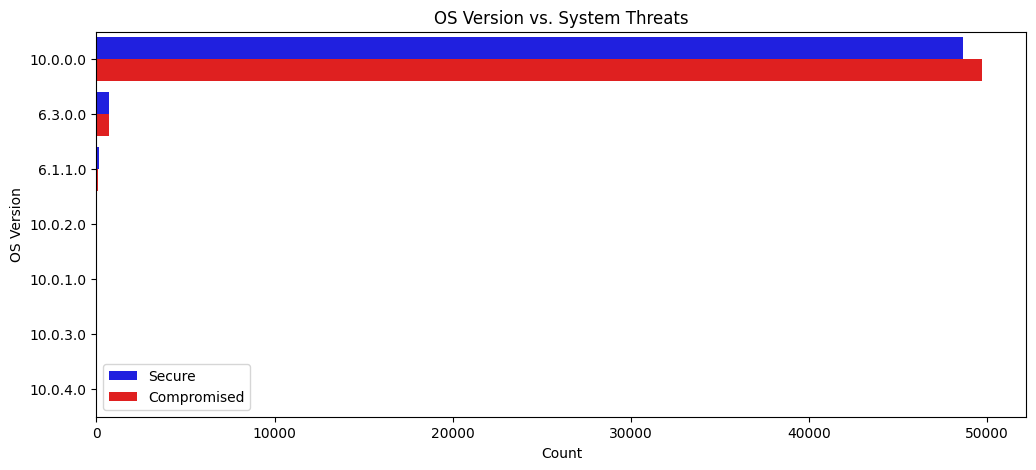

In [15]:
#OSVersion's effect on target distribution
plt.figure(figsize=(12,5))
sns.countplot(y=train['OSVersion'], hue=train['target'], palette=['blue', 'red'])
plt.title("OS Version vs. System Threats")
plt.xlabel("Count")
plt.ylabel("OS Version")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observations**

* The majority of systems, both secure and compromised, use OS version **10.0.0.0**. Other versions **(6.3.0.0, 6.1.1.0, etc.)** have significantly fewer samples.

* The proportion of secure vs. compromised systems across OS versions remains consistent, indicating no strong relationship between OS version and security status.

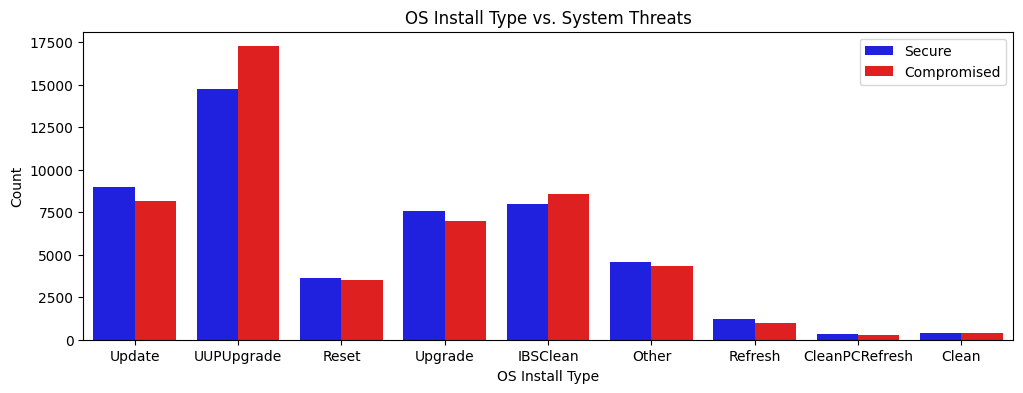

In [16]:
#OSInstallType's effect on target distribution
plt.figure(figsize=(12,4))
sns.countplot(x=train['OSInstallType'], hue=train['target'], palette=['blue', 'red'])
plt.title("OS Install Type vs. System Threats")
plt.xlabel("OS Install Type")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observation**

* Systems installed using UUPUpgrade and IBSClean have higher counts of compromised systems compared to secure ones.

* Other install types like Update, Upgrade, and Reset show more 'secure' distribution

* Install types such as Refresh, CleanPCRefresh, and Clean have relatively low counts overall.

* OS install type appears to be a strong feature for predicting system security, as certain types are associated with higher compromise rates. 

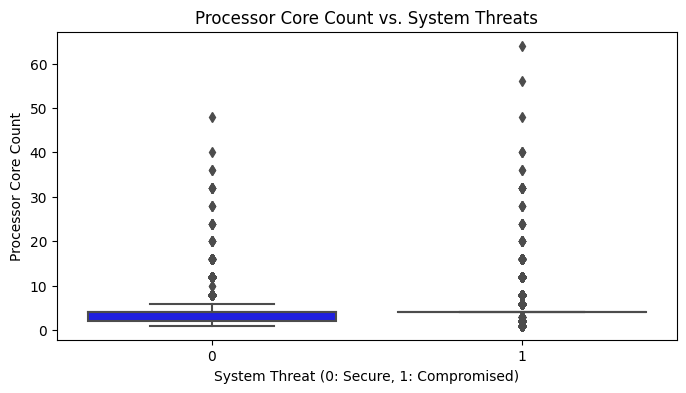

In [17]:
#ProcessorCoreCount's effect on target distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=train['target'], y=train['ProcessorCoreCount'], palette=['blue', 'red'])
plt.title("Processor Core Count vs. System Threats")
plt.xlabel("System Threat (0: Secure, 1: Compromised)")
plt.ylabel("Processor Core Count")
plt.show()

In [18]:
proc = train.groupby('target')['ProcessorCoreCount'].agg(
    Median='median', Mean='mean',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

proc['IQR'] = proc['Q3'] - proc['Q1']

print(proc[['Median', 'Mean', 'IQR']])

        Median      Mean  IQR
target                       
0          4.0  3.894872  2.0
1          4.0  4.125713  0.0


**Observations**

* Median core count is identical for both secure **(4)** and compromised **(4)** systems.
* Outliers with very high core counts (e.g., >50 cores) appear more frequently in compromised systems.
* The narrower IQR for compromised systems indicates that these tend to have more consistent hardware configurations, which could be leveraged in model training.

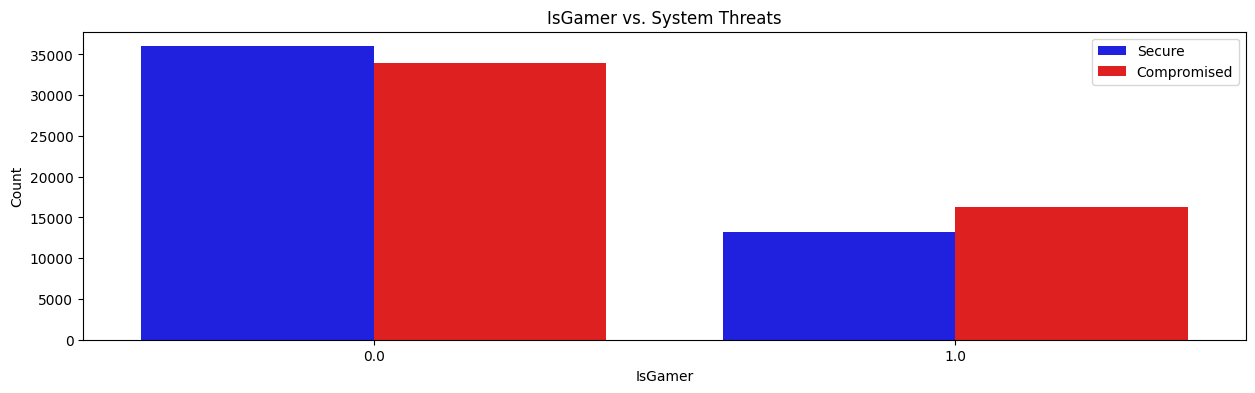

In [19]:
#IsGamer's effect on target distribution
plt.figure(figsize=(15,4))
sns.countplot(x=train['IsGamer'], hue=train['target'], palette=['blue', 'red'])
plt.title("IsGamer vs. System Threats")
plt.xlabel("IsGamer")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observations**

* Systems where IsGamer = 0 have higher counts overall, with a leaning towards secure state

* Systems where IsGamer = 1 (gaming systems) show fewer total counts but a higher proportion of compromised states relative to secure ones.

* This might be attributed to the fact that gamers tend to install more softwares and games which sometimes are pirated causing threats to system security.



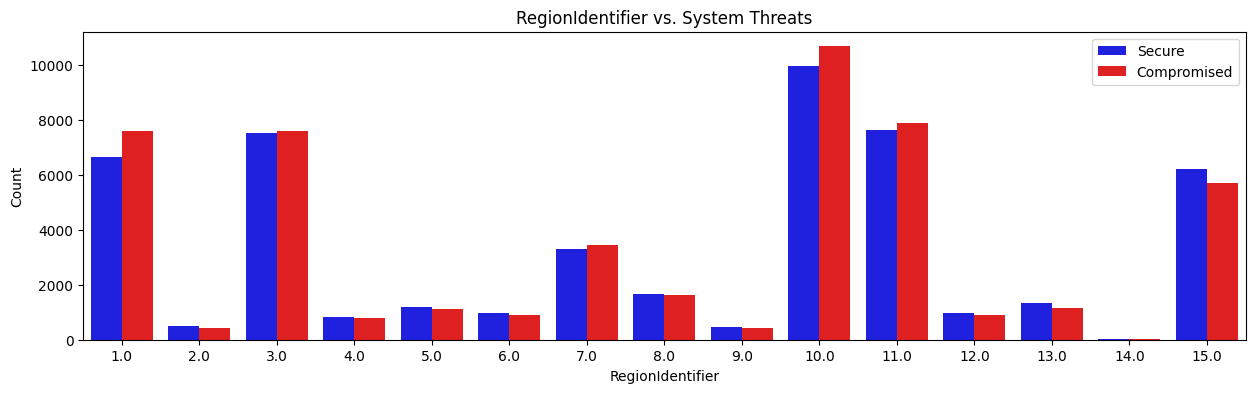

In [20]:
#RegionIdentifier's effect on target distribution
plt.figure(figsize=(15,4))
sns.countplot(x=train['RegionIdentifier'], hue=train['target'], palette=['blue', 'red'])
plt.title("RegionIdentifier vs. System Threats")
plt.xlabel("RegionIdentifier")
plt.ylabel("Count")
plt.legend(["Secure", "Compromised"])
plt.show()

**Observations**

* Regions like 1, 3, 10, 11 and 15 have high counts
* Regions 1 and 10 show high instances of compromised systems compared to secure ones.
* Other regions (e.g., 4, 5, 6, etc.) have lower counts but maintain a balanced distribution between secure and compromised states with slight skewness towards secure instances.
* Region-specific trends suggest geographical factors or regional configurations might influence system security.

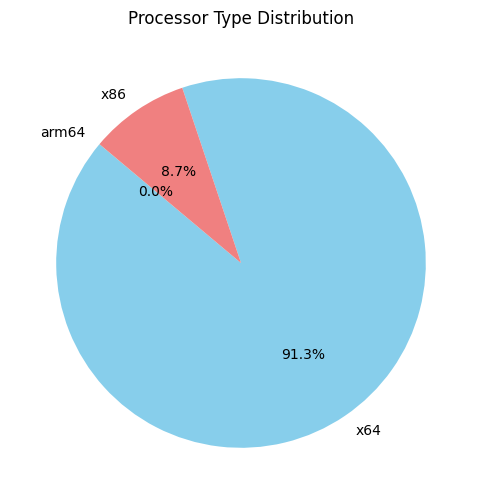

In [21]:
#Processor Type Distribution
plt.figure(figsize=(6, 6))
plt.pie(train['Processor'].value_counts(), labels=train['Processor'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Processor Type Distribution')
plt.show()

**Observations**

* Majority systems (**91.3%**) use x64 processors while **8.7**% machines have a x86 processor.
* There are negligible amounts of machines witih arm64 processors.

# Data Preparation 

In [22]:
#data loading
train=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [23]:
#duplicate removal
train.drop_duplicates(inplace=True)

In [24]:
#dropping single value columns and MachineID(irrelevant)
train.drop(columns=['MachineID', 'IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled'], inplace=True)
test.drop(columns=['MachineID', 'IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled'], inplace=True)

In [25]:
#Creating OS_Update_Days from DateOS and DateAS
train['DateOS'] = pd.to_datetime(train['DateOS'])
train['DateAS'] = pd.to_datetime(train['DateAS'])
train['OS_Update_Days'] = (train['DateOS'] - train['DateAS']).dt.days
test['DateOS'] = pd.to_datetime(test['DateOS'])
test['DateAS'] = pd.to_datetime(test['DateAS'])
test['OS_Update_Days'] = (test['DateOS'] - test['DateAS']).dt.days
train.drop(columns=['DateOS', 'DateAS'], inplace=True)
test.drop(columns=['DateOS', 'DateAS'], inplace=True)

In [26]:
#Preprocessing Pipeline
x = train.drop(columns=['target'])
y = train['target']

numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=5))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X_processed = pipeline.fit_transform(x)
print("Processed data shape:", X_processed.shape)

Processed data shape: (99835, 157)


In [27]:
#Test Train Split
x_train, x_test, y_train, y_test = train_test_split(X_processed,y, test_size=0.2, random_state=42)

# Model Training 

# Logistic Regression

In [28]:
#param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
#grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
#grid_lr.fit(X_train_pca, y_train)
#lr = grid_lr.best_estimator_

#Not added in kaggle code due to excessive train time (tested on local system)

In [29]:
lr = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')

In [30]:
y_pred1 = lr.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53      9852
           1       0.53      0.51      0.52     10115

    accuracy                           0.53     19967
   macro avg       0.53      0.53      0.53     19967
weighted avg       0.53      0.53      0.53     19967



# RandomForestClassifier

In [31]:
#param_grid_rf = {'n_estimators': [100, 200, 300, 500], 'max_depth': [15, 20, 25], 'min_samples_split': [10, 15, 20]}
#grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc')
#grid_rf.fit(x_train, y_train)
#rfc = grid_rf.best_estimator_

#Not added in kaggle code due to excessive train time (tested on local system)

In [32]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=20, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=20, n_estimators=500,
                       random_state=42)

In [33]:
y_pred2 = rfc.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      9852
           1       0.62      0.65      0.63     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967



# AdaBoostClassifier

In [34]:
#param_grid_ab = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
#grid_ab = GridSearchCV(AdaBoostClassifier(), param_grid_ab, cv=5, scoring='roc_auc')
#grid_ab.fit(x_train, y_train)
#abc = grid_ab.best_estimator_

#Not added in kaggle code due to excessive train time (tested on local system)

In [35]:
abc=AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)
abc.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

In [36]:
y_pred3 = abc.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.55      0.59      9852
           1       0.61      0.68      0.64     10115

    accuracy                           0.61     19967
   macro avg       0.62      0.61      0.61     19967
weighted avg       0.62      0.61      0.61     19967



# Comparison

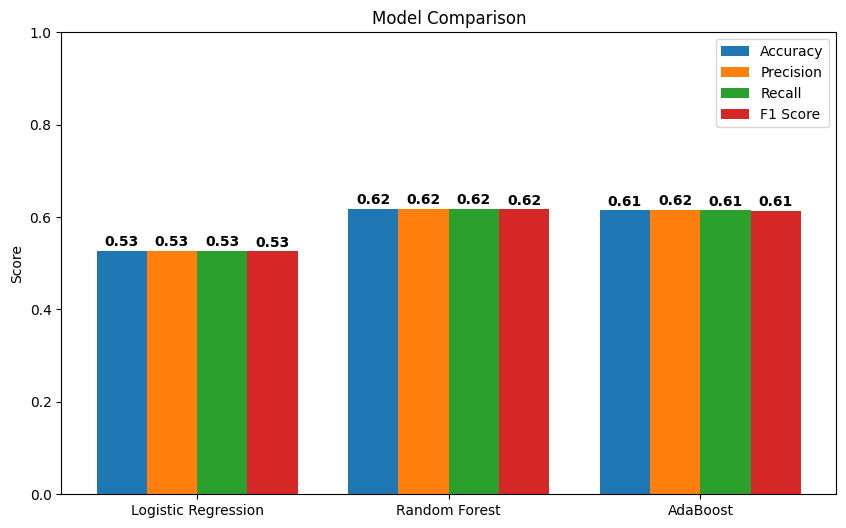

In [37]:
#Performance Metrics

models = ['Logistic Regression', 'Random Forest', 'AdaBoost']
y_preds = [y_pred1, y_pred2, y_pred3]

metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for i, y_pred in enumerate(y_preds):
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

bar_width = 0.2
x = np.arange(len(models))
plt.figure(figsize=(10, 6))

for i, (metric_name, values) in enumerate(metrics.items()):
    bars = plt.bar(x + i * bar_width, values, width=bar_width, label=metric_name)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
                 f"{bar.get_height():.2f}", ha='center', fontsize=10, fontweight='bold')

plt.xticks(x + 1.5 * bar_width, models)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.legend()
plt.show()
    

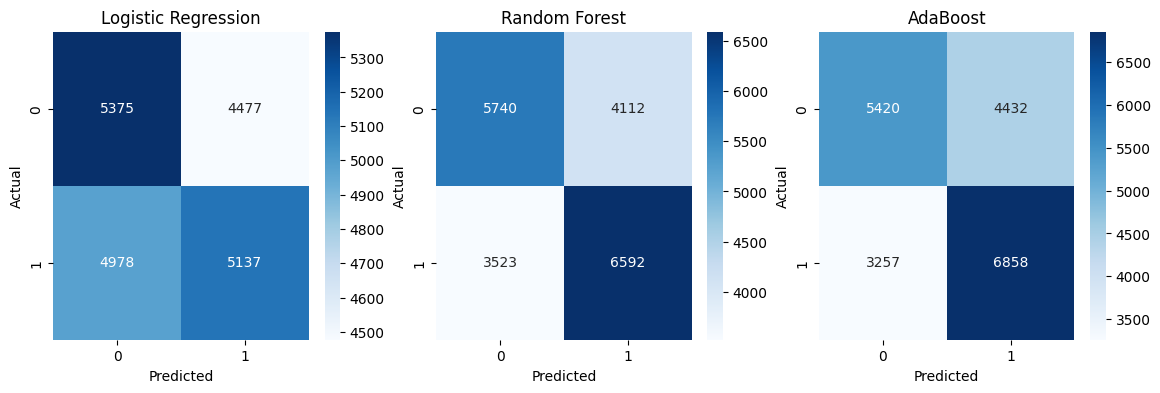

In [38]:
#Confusion Matrix
plt.figure(figsize=(14, 4))
for i in range(3):
    cm = confusion_matrix(y_test, y_preds[i])
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{models[i]}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.show()

In [39]:
results = []
for model, y_pred in zip(models, y_preds):
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    df_report = pd.DataFrame(report).transpose()
    df_report['Model'] = model
    df_report.loc['accuracy', 'precision'] = accuracy
    results.append(df_report)
final_report = pd.concat(results)
print(final_report)

              precision    recall  f1-score       support                Model
0              0.519173  0.545575  0.532047   9852.000000  Logistic Regression
1              0.534325  0.507860  0.520756  10115.000000  Logistic Regression
accuracy       0.526469  0.526469  0.526469      0.526469  Logistic Regression
macro avg      0.526749  0.526717  0.526401  19967.000000  Logistic Regression
weighted avg   0.526849  0.526469  0.526327  19967.000000  Logistic Regression
0              0.619670  0.582623  0.600575   9852.000000        Random Forest
1              0.615845  0.651705  0.633268  10115.000000        Random Forest
accuracy       0.617619  0.617619  0.617619      0.617619        Random Forest
macro avg      0.617757  0.617164  0.616922  19967.000000        Random Forest
weighted avg   0.617732  0.617619  0.617137  19967.000000        Random Forest
0              0.624640  0.550142  0.585029   9852.000000             AdaBoost
1              0.607440  0.678003  0.640785  10115.0

**Observations**

* Both RandomForestClassifier and AdaBoost outperform LogisticRegression in terms of precision.
* LogisticRegression has lower precision overall **(0.53)**, which reflects a less confident classifier.
* AdaBoost performs better in recall for class 1 **(0.68)**, showing it can detect class 1 instances more effectively than RandomForestClassifier **(0.65)**.
* RandomForestClassifier has a higher recall for class 0 **(0.58)** than the other 2 models ( **0.545 and 0.55, respectively)**, which helps improve the detection of class 0 instances.
* RandomForestClassifier and AdaBoost both show better F1-scores **(0.62 and 0.61, respectively)** compared to LR **(0.53)**.
* RandomForestClassifier has a more balanced F1-score across both classes **(0.60 and 0.63)**, while AdaBoost has a slightly higher F1-score for class 1 **(0.64)** but a marginally lower one for class 0 **(0.59)**.
* RandomForestClassifier achieves the highest accuracy **(0.62)**, outperforming both AdaBoost **(0.61)** and LogisticRegression **(0.53)**.


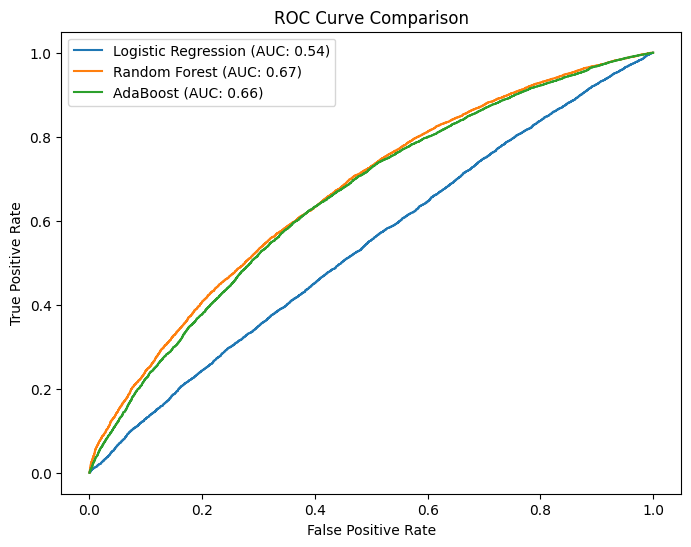

In [40]:
#ROC Curve
model=[lr, rfc, abc]
plt.figure(figsize=(8, 6))
for i in range(3):
    y_prob = model[i].predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{models[i]} (AUC: {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

**Observations**
* RandomForestClassifier has the highest ROC-AUC score **(0.67)**, demonstrating its ability to separate the two classes more effectively.
* AdaBoost follows closely with a ROC-AUC score of **0.66**, which also indicates strong class separation but slightly less confidence compared to RandomForestClassifier.
* LogisticRegression has the lowest ROC-AUC **(0.54)**, suggesting it has poor discriminatory power between the two classes.


# Result
Random Forest Classifier stands out as the best model among the three based on the following criteria:

* **Higher Accuracy**: RandomForestClassifier achieves the highest accuracy of 0.62, which is a significant improvement over LogisticRegression's 0.53 and slightly better than AdaBoost's's 0.61.
* **Better ROC-AUC**: RandomForestClassifier's ROC-AUC score of 0.67 indicates superior class separation, showing it can make more confident predictions.
* **Balanced Performance**: RandomForestClassifier performs well across precision, recall, and F1-score for both classes, with class 1 benefiting from higher recall (0.65) and class 0 being better detected than by the other 2 models.

# Submission.csv

In [41]:
test_processed = pipeline.transform(test)
y_pred=rfc.predict(test_processed)
output_df = pd.DataFrame({
    'id': test.index,  
    'target': y_pred
})

output_df.to_csv('/kaggle/working/submission.csv', index=False)